<a href="https://colab.research.google.com/github/a7482472/Major-project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7368 - loss: 0.6058 - val_accuracy: 0.8828 - val_loss: 0.2987
Epoch 2/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8918 - loss: 0.3065 - val_accuracy: 0.9235 - val_loss: 0.2642
Epoch 3/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9127 - loss: 0.2885 - val_accuracy: 0.9316 - val_loss: 0.2518
Epoch 4/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9210 - loss: 0.2758 - val_accuracy: 0.9350 - val_loss: 0.2409
Epoch 5/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9234 - loss: 0.2642 - val_accuracy: 0.9386 - val_loss: 0.2362
Epoch 6/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9257 - loss: 0.2636 - val_accuracy: 0.9405 - val_loss: 0.2279
Epoch 7/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9273 - loss: 0.2563 - val_accuracy: 0.9314 - val_loss: 0.2175
Epoch 8/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9319 - loss: 0.2400 - val_accuracy: 0.

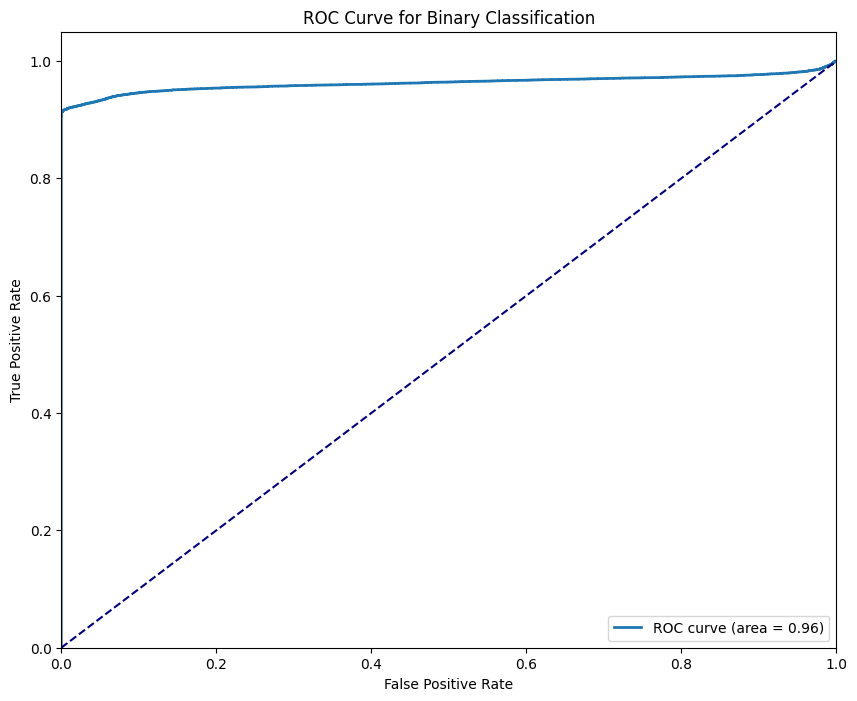

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
def load_data(csv_file, time_steps=10):
    data = pd.read_csv(csv_file)
    features = data[['heart_rate', 'blood_pressure', 'oxygen_saturation', 'respiratory_rate', 'temperature']].values
    labels = data['Label'].values

    # Scale features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i + time_steps])
        y.append(labels[i + time_steps - 1])  # Label for the end of each sequence

    # Reshape X for LSTM input
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load data
csv_file = '/content/CVD_Vital_SIgns.csv'  # Path to uploaded file
X, y = load_data(csv_file)

# Build simplified LSTM model
def build_simplified_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(units=4, activation='relu'),  # Reduced to a single LSTM layer with fewer units
        Dense(1, activation='sigmoid')
    ])
    return model

# Define model input shape based on X
input_shape = (X.shape[1], X.shape[2])  # (time_steps, features)
model = build_simplified_lstm_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with fewer epochs and larger batch size
history = model.fit(X, y, epochs=20, batch_size=64, validation_split=0.2)  # Reduced epochs

# Make predictions
predictions = model.predict(X).flatten()

# Convert predictions to binary labels
binary_predictions = (predictions > 0.5).astype(int)

# Ensure all arrays are 1D
y = y.flatten()
binary_predictions = binary_predictions.flatten()
predictions = predictions.flatten()

# Evaluate the model
def evaluate_model(y_true, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot ROC curve for binary classification
    plot_roc_curve(y_true, y_pred_prob)

# Define function to plot ROC curve for binary classification
def plot_roc_curve(y_true, y_pred_prob):
    plt.figure(figsize=(10, 8))

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

    # Plot settings
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Binary Classification')
    plt.legend(loc="lower right")
    plt.show()

# Call evaluation with appropriate arguments
evaluate_model(y, binary_predictions, predictions)
